# Homework Data Visualization

- Nama: Salsabila Mardhiyah

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

# please import as much as you need

In [3]:
# read your data

df = pd.read_csv('/Users/salsa/Data Science/DS-31/Week 8/HW/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# melihat data duplikat
df.duplicated().any()

False

# Normal

## 1.
## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

Langkah-langkah:
- Kelompokkan data berdasarkan metode pembayaran dan gunakan fungsi agregasi
yang tepat untuk kasus ini.
- Kemudian, buatlah grafik yang tepat menurutmu

In [6]:
# your code goes here!
df1 = df.groupby(['PaymentMethod']).agg({'MonthlyCharges' : 'mean'}).round(3).sort_values('MonthlyCharges', ascending=False).reset_index()
df1

,PaymentMethod,MonthlyCharges
0,Electronic check,76.256
1,Bank transfer (automatic),67.193
2,Credit card (automatic),66.512
3,Mailed check,43.917


In [115]:
df1.loc[0][1]

76.256

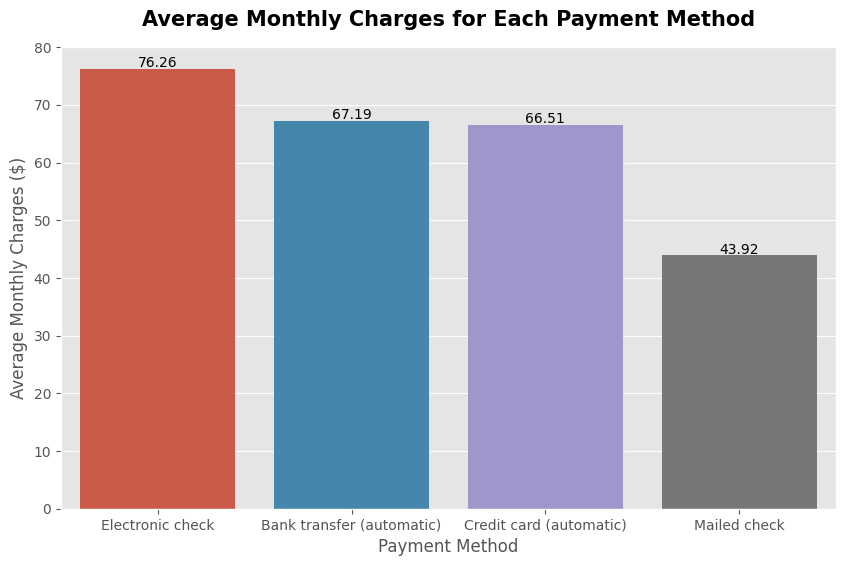

In [122]:
# melihat plot grafik data frame df1
style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='PaymentMethod', y='MonthlyCharges')


plt.title(label='Average Monthly Charges for Each Payment Method', weight='bold', pad=15, fontsize=15)
plt.ylabel(ylabel='Average Monthly Charges ($)')
plt.xlabel(xlabel='Payment Method')


plt.text(x=0, y=(df1.loc[0][1] + 1), s=f'{round(df1.loc[0][1],2)}', ha='center', va='center', fontsize=10)
plt.text(x=1, y=(df1.loc[1][1] + 1), s=f'{round(df1.loc[1][1],2)}', ha='center', va='center', fontsize=10)
plt.text(x=2, y=(df1.loc[2][1] + 1), s=f'{round(df1.loc[2][1],2)}', ha='center', va='center', fontsize=10)
plt.text(x=3, y=(df1.loc[3][1] + 1), s=f'{round(df1.loc[3][1],2)}', ha='center', va='center', fontsize=10)
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:
* rata-rata monthly charges paling besar terdapat pada user degan payment method electronic check
* rata-rata monthly charges pada user degan payment method bank transfer kurang lebih sama dengan credit card
* rata-rata monthly charges paling kecil terdapat pada user degan payment method mailed check

## 2.
## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

Langkah-langkah
- Kelompokkan data dengan menggunakan fungsi numpy.where atau pandas.cut
- Gunakan fungsi agregasi yang tepat untuk kasus ini.
- Kemudian, buatlah grafik yang tepat menurutmu

In [8]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [9]:
# your code goes here!
# membuat kolom tenure group
df['tenure_group'] = pd.cut(x=df['tenure'], 
                    bins=[-1, 20, 40, 80],
                    labels=['low_tenure', 'medium_tenure', 'high_tenure']
                    )
df.sample(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6793,1320-GVNHT,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Two year,Yes,Credit card (automatic),108.4,7767.25,No,high_tenure
2136,1379-FRVEB,Male,0,No,Yes,15,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,91.0,1430.05,No,low_tenure


In [10]:
# mengelompokkan jumlah customer id berdasarkan tenure group
df2 = df.groupby(['tenure_group']).agg({'customerID' : 'nunique'}).reset_index()
df2

,tenure_group,customerID
0,low_tenure,2878
1,medium_tenure,1408
2,high_tenure,2757


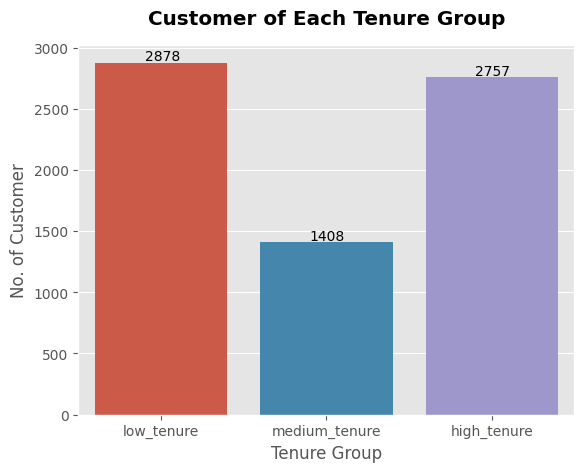

In [133]:
# membuat grafik jumlah customer per tenure group
style.use('ggplot')
sns.barplot(data=df2, x='tenure_group', y='customerID')

plt.ylabel(ylabel='No. of Customer')
plt.xlabel(xlabel='Tenure Group')
plt.title(label='Customer of Each Tenure Group', weight='bold', pad=15) 

plt.text(x=0 -0.1, y=(df2.loc[0][1] + 20), s=df2.loc[0][1])
plt.text(x=1 -0.1, y=(df2.loc[1][1] + 20), s=df2.loc[1][1])
plt.text(x=2 -0.1, y=(df2.loc[2][1] + 20), s=df2.loc[2][1])

plt.show()

Jadi, dari plot di atas, kami menyimpulkan bahwa:
* mayoritas user memiliki tenure yang tergolong low dan high dengan perbedaan yang tidak signifikan
* sebagian kecil user tergolong pada medium tenure dengan tenure 21-40 bulan

## 3.
## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya

 Langkah-langkah:
- Kelompokkan data berdasarkan dengan apakah pelanggan tersebut merupakan
warga senior dan menggunakan layanan telepon, kemudian hitung jumlah unik
pelanggannya.
- Buat pula rasio persentase dari jumlah unik customer tersebut.
- Untuk mempermudah, buat grafik dengan data tersebut menggunakan library
seaborn dan gunakan parameter ‘hue’



In [14]:
# cross tab percentage/proportion
crosstab_prop = pd.crosstab(index=df['SeniorCitizen'], 
                            columns=df['PhoneService'],
                            normalize='index')
crosstab_prop

PhoneService,No,Yes
SeniorCitizen,,
0,0.097950,0.902050
1,0.091068,0.908932


In [55]:
# cross tab count
crosstab = pd.crosstab(index=df['SeniorCitizen'],
                        columns=df['PhoneService'])
crosstab

PhoneService,No,Yes
SeniorCitizen,,
0,578,5323
1,104,1038


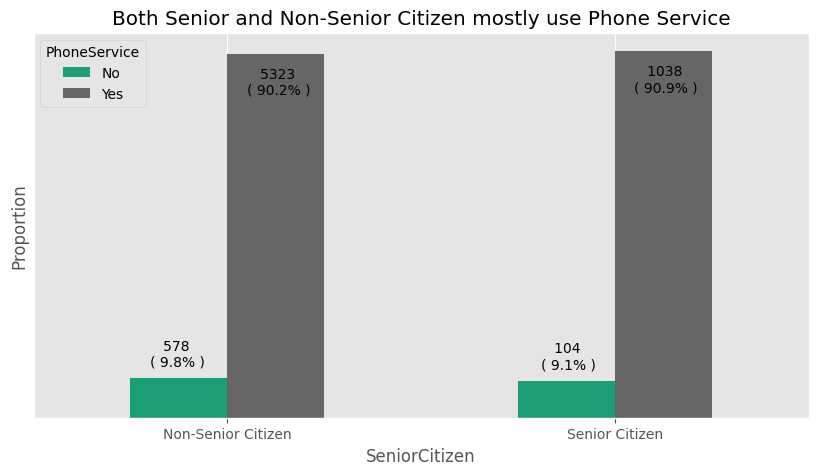

In [105]:
# crosstab prop barplot
crosstab_prop.plot(kind='bar', figsize=(10,5), colormap='Dark2')

plt.text(x=-0.2, y=crosstab_prop.loc[0][0] + 0.03, s=f'   {crosstab.loc[0][0]}\n( {np.round(crosstab_prop.loc[0][0] * 100, 1)}% )')
plt.text(x=0.05, y=crosstab_prop.loc[0][1] - 0.1, s=f'   {crosstab.loc[0][1]}\n( {np.round(crosstab_prop.loc[0][1] * 100, 1)}% )')
plt.text(x=0.81, y=crosstab_prop.loc[1][0] + 0.03, s=f'   {crosstab.loc[1][0]}\n( {np.round(crosstab_prop.loc[1][0] * 100, 1)}% )')
plt.text(x=1.05, y=crosstab_prop.loc[1][1] - 0.1, s=f'   {crosstab.loc[1][1]}\n( {np.round(crosstab_prop.loc[1][1] * 100, 1)}% )')

plt.xticks(ticks=[0, 1], labels=['Non-Senior Citizen', 'Senior Citizen'], rotation=0)
plt.yticks([])
plt.ylabel(ylabel='Proportion')
plt.title('Both Senior and Non-Senior Citizen mostly use Phone Service')
plt.show()

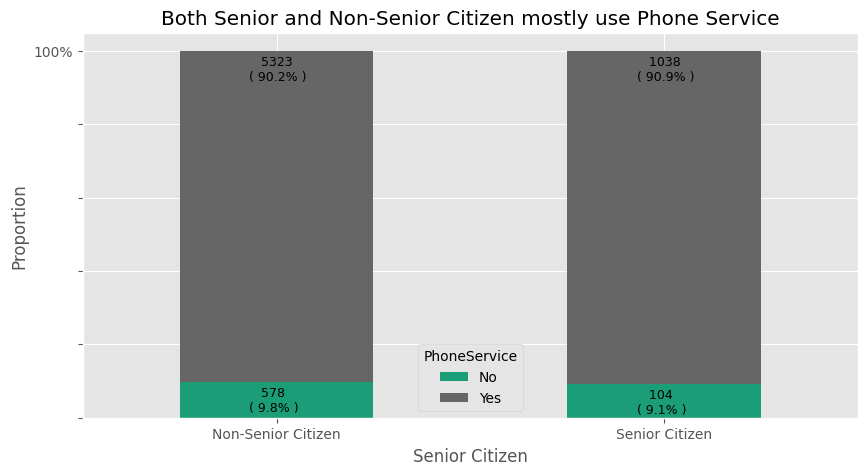

In [358]:
# 100% stacked crosstab prop barplot
crosstab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='Dark2',
                    figsize=(10,5)
                    )
plt.xlabel('Senior Citizen')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Non-Senior Citizen', 'Senior Citizen'], rotation=0)
plt.yticks((np.arange(0, 1.1, 0.2)), labels=['','','','','','100%'])
plt.title('Both Senior and Non-Senior Citizen mostly use Phone Service')

for n, x in enumerate(crosstab.index.values):
    for (proportion, count, y_loc) in zip(crosstab_prop.loc[x],
                                        crosstab.loc[x],
                                        crosstab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.07,
                y=y_loc - 0.08,
                s=f'   {count}\n( {np.round(proportion * 100, 1)}% )',
                color='black',
                fontsize=9,
                fontweight='light')

Jadi, dari plot di atas, dapat disimpulkan bahwa:
* mayoritas senior citizen berlangganan phone service, begitu pula dengan pelanggan non-senior citizen
* proporsi pengguna phone service baik pada senior dan non senior citizen berada di atas 90%
* kurang dari 10% pelanggan tidak berlangganan phone service

## 4.
## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

Langkah-langkah:
- Ubah tipe data kolom total biaya dari object menjadi integer atau float dan perhatikan
kelengkapan value dari kolom tersebut.
- Buat plot distribusi untuk kolom tersebut

In [18]:
# your code goes here!
# melihat info kolom Total Charges
df['TotalCharges'].describe() # top value adalah string kosong

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [20]:
# mengubah kolom Total Charges menjadi numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# mengubah nilai nan menjadi 0
df = df.replace(np.nan, 0, regex=True)

# melihat info kolom Total Charges yang telah diubah
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

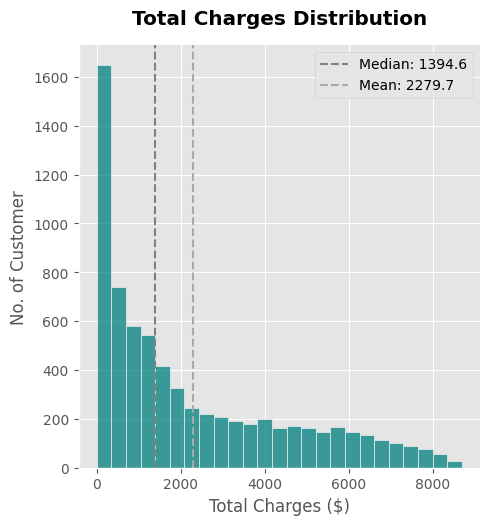

In [320]:
# membuat grafik distribusi kolom Total Charges
# median
median = np.median(df['TotalCharges'])
mean = np.mean(df['TotalCharges'])

#plot
sns.displot(data=df, x='TotalCharges', color='#008080')
plt.title(label='Total Charges Distribution', weight='bold', pad=15)
plt.xlabel(xlabel='Total Charges ($)')
plt.ylabel(ylabel='No. of Customer')

# membuat garis mean dan median
plt.axvline(x=median, ls='--', c='grey', label=f'Median: {round(median,1)}')
plt.axvline(x=mean, ls='--', c='darkgrey',label=f'Mean: {round(mean,1)}')
plt.legend()

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:
* Distribusi Total Charges customer memiliki sebaran melenceng ke kanan (positively skewed) dengan nilai rata-rata lebih besar dari median
* 50% pelanggan memiliki total charges kurang dari 1500

# Intermediate

## 5.
## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

Langkah-langkah:
* Bandingkan distribusi biaya bulanan antara pelanggan yang berhenti dan tetap
berlangganan.
* Untuk mempermudah, buat grafik dengan data tersebut menggunakan library
seaborn dan gunakan parameter ‘hue’

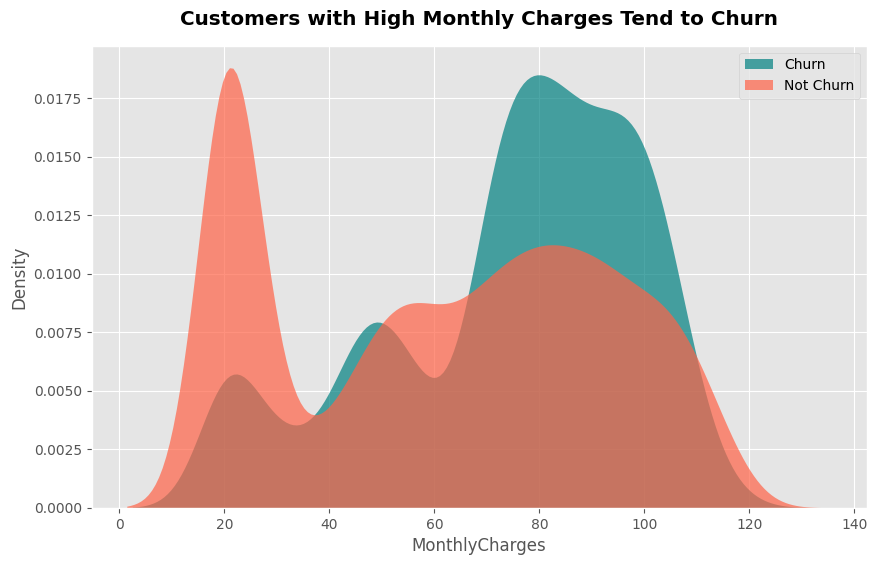

In [142]:
# plot
plt.figure(figsize=(10,6))
sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'Yes')], color='#008080', fill= True, alpha=.7, linewidth=0, label='Churn')
sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'No')], color='#FF6347', fill= True, alpha=.7, linewidth=0, label='Not Churn')

# title and legend
plt.title('Customers with High Monthly Charges Tend to Churn', pad=15, weight='bold')
plt.legend()
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa customer yang memiliki monthly charges lebih tinggi cenderung churn

## 6.
## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

Langkah-langkah:
* Gabungkan data yang menunjukan pelanggan memiliki pasangan dan/atau
tanggungan.
    - Memiliki pasangan dan tanggungan
    - Memiliki pasangan dan tidak memiliki tanggungan
    - Tidak memiliki pasangan, namun memiliki tanggungan
    - Tidak memiliki pasangan dan tanggungan
* Kemudian, hitung rasio pelanggan yang berhenti berlangganan (churn)

In [25]:
# your code goes here!
df6 = df.copy()
df6.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure


In [26]:
# melihat info kolom partner dan dependent
df6[['Partner', 'Dependents']].describe()

,Partner,Dependents
count,7043,7043
unique,2,2
top,No,No
freq,3641,4933


In [27]:
# concat kolom partner dan dependants
df6['PartnerDependents'] = df6['Partner'] + df6['Dependents']
df6.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,PartnerDependents
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure,YesNo
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure,NoNo


In [186]:
# cross tab
partnerdep = pd.crosstab(index=df6['PartnerDependents'], 
                        columns=df6['Churn'])
partnerdep

Churn,No,Yes
PartnerDependents,,
NoNo,2157,1123
NoYes,284,77
YesNo,1233,420
YesYes,1500,249


In [268]:
# cross tab proportion
partnerdep_prop = pd.crosstab(index=df6['PartnerDependents'],
                            columns=df6['Churn'],
                            normalize='index').sort_values('Yes', ascending=False)
partnerdep_prop

Churn,No,Yes
PartnerDependents,,
NoNo,0.657622,0.342378
YesNo,0.745917,0.254083
NoYes,0.786704,0.213296
YesYes,0.857633,0.142367


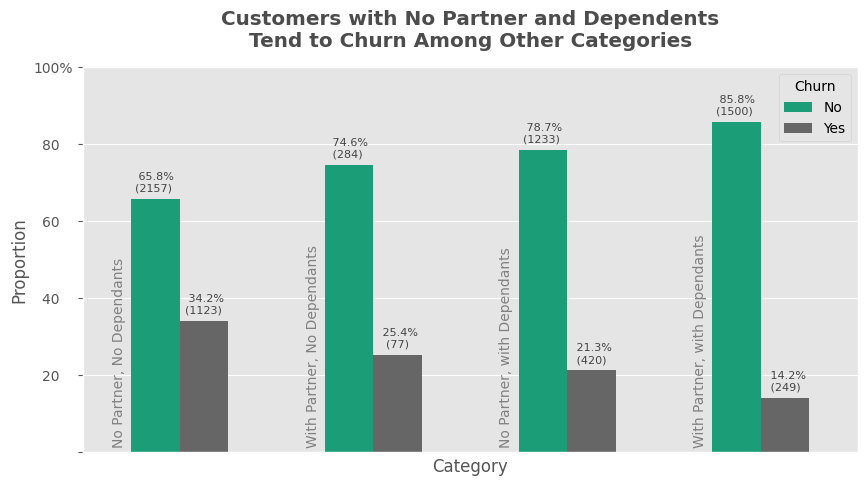

In [309]:
# membuat plot jumlah churn berdasarkan df partnerdependent
partnerdep_prop.plot(kind='bar', colormap='Dark2', figsize=(10,5))

# title and axis label
plt.title('Customers with No Partner and Dependents\nTend to Churn Among Other Categories', loc='center', weight='bold', pad=15, alpha=0.7)
plt.ylabel(ylabel='Proportion')
plt.xlabel(xlabel='Category')
plt.xticks([])
plt.yticks(np.arange(0, 1.2, 0.2), labels=['  ','20   ','40   ','60   ','80   ','100%'])

# categories
plt.text(x=0 - 0.35, y=0.02, s='No Partner, No Dependants', color='grey', rotation=90)
plt.text(x=1 - 0.35, y=0.02, s='With Partner, No Dependants', color='grey', rotation=90)
plt.text(x=2 - 0.35, y=0.02, s='No Partner, with Dependants', color='grey', rotation=90)
plt.text(x=3 - 0.35, y=0.02, s='With Partner, with Dependants', color='grey', rotation=90)

# values and proportions
plt.text(x=0 -0.23, y=partnerdep_prop['No'][0] + 0.02, s=f''' {np.round(partnerdep_prop['No'][0] * 100, 1)}%\n({partnerdep['No'][0]})''', size=8, alpha=0.7)
plt.text(x=0 +0.03, y=partnerdep_prop['Yes'][0] + 0.02, s=f''' {np.round(partnerdep_prop['Yes'][0] * 100, 1)}%\n({partnerdep['Yes'][0]})''', size=8, alpha=0.7)
plt.text(x=1 -0.23, y=partnerdep_prop['No'][1] + 0.02, s=f''' {np.round(partnerdep_prop['No'][1] * 100, 1)}%\n ({partnerdep['No'][1]})''', size=8, alpha=0.7)
plt.text(x=1 +0.03, y=partnerdep_prop['Yes'][1] + 0.02, s=f''' {np.round(partnerdep_prop['Yes'][1] * 100, 1)}%\n  ({partnerdep['Yes'][1]})''', size=8, alpha=0.7)
plt.text(x=2 -0.23, y=partnerdep_prop['No'][2] + 0.02, s=f''' {np.round(partnerdep_prop['No'][2] * 100, 1)}%\n({partnerdep['No'][2]})''', size=8, alpha=0.7)
plt.text(x=2 +0.03, y=partnerdep_prop['Yes'][2] + 0.02, s=f''' {np.round(partnerdep_prop['Yes'][2] * 100, 1)}%\n ({partnerdep['Yes'][2]})''', size=8, alpha=0.7)
plt.text(x=3 -0.23, y=partnerdep_prop['No'][3] + 0.02, s=f''' {np.round(partnerdep_prop['No'][3] * 100, 1)}%\n({partnerdep['No'][3]})''', size=8, alpha=0.7)
plt.text(x=3 +0.03, y=partnerdep_prop['Yes'][3] + 0.02, s=f''' {np.round(partnerdep_prop['Yes'][3] * 100, 1)}%\n ({partnerdep['Yes'][3]})''', size=8, alpha=0.7)

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:
* pelanggan yang tidak memiliki partner dan dependants cenderung berhenti berlangganan
* sebaliknya, pelanggan dengan partner dan dependants cenderung tidak berhenti berlangganan

# Soal Hard

## 7.
## Buatlah insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut dengan memanfaatkan atribut tenure, contract, monthly charges, status*, jumlah pelanggan, dan churn! 

Langkah-langkah:
- Wajib menggunakan kelima atribut (tenure, contract, monthly charges, status, jumlah
pelanggan, churn)
- Cari insight yang berkaitan dengan kelima atribut tersebut, dan visualisasikan
(usahakan membuat visualisasi lebih dari satu)!
- Tambahkan storyline di dalam visualisasi tersebut

Atribut status didapatkan dengan asumsi:
- Married : pelanggan adalah senior citizen atau memiliki partner atau memiliki dependents
- Single : tidak memiliki status seperti yang disebutkan diatas

In [32]:
# membuat kolom status
df7 = df.copy()
df7['Status'] = np.where((df['SeniorCitizen'] == 1) | (df['Partner'] == 'Yes') | (df['Dependents']== 'Yes'), 'Married', 'Single')
df7.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,Status
4304,9732-OUYRN,Female,0,Yes,No,49,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Credit card (automatic),19.00,918.70,No,high_tenure,Married
1493,6416-YJTTB,Male,0,No,No,11,Yes,No,Fiber optic,Yes,...,No,No,Month-to-month,Yes,Bank transfer (automatic),79.50,795.65,No,low_tenure,Single
1802,7492-TAFJD,Male,0,Yes,Yes,7,No,No phone service,DSL,Yes,...,No,No,Two year,No,Mailed check,38.55,280.00,No,low_tenure,Married


In [33]:
# melihat statistik kolom numerik
df7[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [34]:
# melihat statistik kolom kategorik
df7[['Status', 'Contract', 'Churn']].describe()

,Status,Contract,Churn
count,7043,7043,7043
unique,2,3,2
top,Married,Month-to-month,No
freq,4324,3875,5174


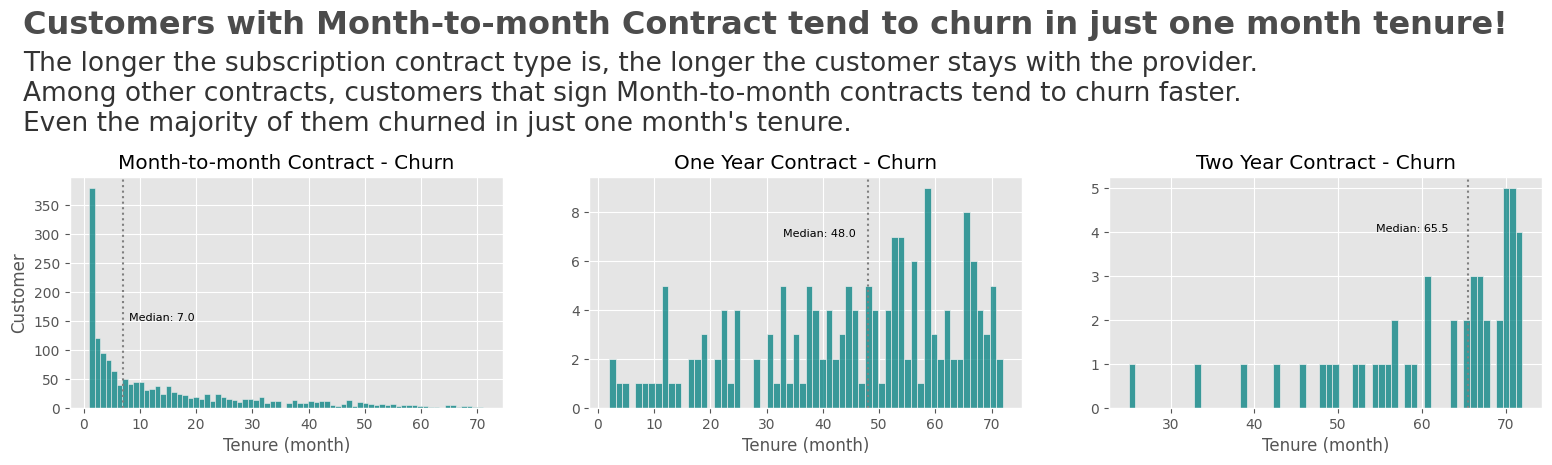

In [345]:
# median
median_mtm = df7[(df7['Contract']=='Month-to-month') & (df7['Churn'] == 'Yes')]['tenure'].median()
median_oy = df7[(df7['Contract']=='One year') & (df7['Churn'] == 'Yes')]['tenure'].median()
median_ty = df7[(df7['Contract']=='Two year') & (df7['Churn'] == 'Yes')]['tenure'].median()

# title
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19,3))
plt.text(x= -107, y= 8.5, s='Customers with Month-to-month Contract tend to churn in just one month tenure!', fontsize=23, weight='bold', alpha=0.7)
plt.text(x= -107, y= 6.3, s='''The longer the subscription contract type is, the longer the customer stays with the provider.\nAmong other contracts, customers that sign Month-to-month contracts tend to churn faster.\nEven the majority of them churned in just one month's tenure.''', fontsize=19, alpha=0.8)


# sub plots
plt.subplot(1,3,1)
ax = sns.histplot(df7[(df7['Contract']=='Month-to-month') & (df7['Churn'] == 'Yes')]['tenure'], bins=72, color='#008080')
ax.set_xlabel('Tenure (month)')
ax.set_ylabel('Customer')
ax.set_title('Month-to-month Contract - Churn')
ax.axvline(x=median_mtm, ls=':', color='grey')
ax.text(s=f'Median: {round(median_mtm,1)}', x=(median_mtm + 1), y=150, fontsize=8)

plt.subplot(1,3,2)
ax = sns.histplot(df7[(df7['Contract']=='One year') & (df7['Churn'] == 'Yes')]['tenure'],bins=60, color='#008080')
ax.set_title('One Year Contract - Churn')
ax.set_xlabel('Tenure (month)')
ax.set_ylabel('')
ax.axvline(x=median_oy, ls=':', color='grey')
ax.text(s=f'Median: {round(median_oy,1)}', x=(median_oy - 15), y=7, fontsize=8)

plt.subplot(1,3,3)
ax = sns.histplot(df7[(df7['Contract']=='Two year') & (df7['Churn'] == 'Yes')]['tenure'],bins=60,color='#008080')
ax.set_title('Two Year Contract - Churn')
ax.set_xlabel('Tenure (month)')
ax.set_ylabel('')
ax.axvline(x=median_ty, ls=':', color='grey')
ax.text(s=f'Median: {round(median_ty,1)}', x=(median_ty - 11), y=4, fontsize=8)

plt.show()

In [350]:
# your code goes here!
# membuat kolom monthly charges group
dfx = df7.copy()
dfx['monthly_group'] = pd.cut(x=df7['MonthlyCharges'], 
                    bins=[-1, 40, 80, 140],
                    labels=['low_monthly_charges', 'medium_monthly_charges', 'high_monthly_charges']
                    )
dfx.sample(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,Status,monthly_group
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No,medium_tenure,Single,high_monthly_charges
5150,7017-VFULY,Female,0,Yes,No,2,Yes,No,No,No internet service,...,No internet service,Month-to-month,No,Bank transfer (automatic),20.1,43.15,No,low_tenure,Married,low_monthly_charges


In [353]:
# mengelompokkan jumlah customer id berdasarkan tenure group
dfx2 = dfx.groupby(['monthly_group']).agg({'customerID' : 'nunique'}).reset_index()
dfx2

,monthly_group,customerID
0,low_monthly_charges,1838
1,medium_monthly_charges,2539
2,high_monthly_charges,2666


In [401]:
dfc = pd.crosstab(index=dfx['Status'], columns=dfx['monthly_group'])
dfc

monthly_group,low_monthly_charges,medium_monthly_charges,high_monthly_charges
Status,,,
Married,1045,1430,1849
Single,793,1109,817


In [400]:
dfcp = pd.crosstab(index=dfx['Status'], columns=dfx['monthly_group'], normalize='index')
dfcp

monthly_group,low_monthly_charges,medium_monthly_charges,high_monthly_charges
Status,,,
Married,0.241674,0.330712,0.427613
Single,0.291651,0.407871,0.300478


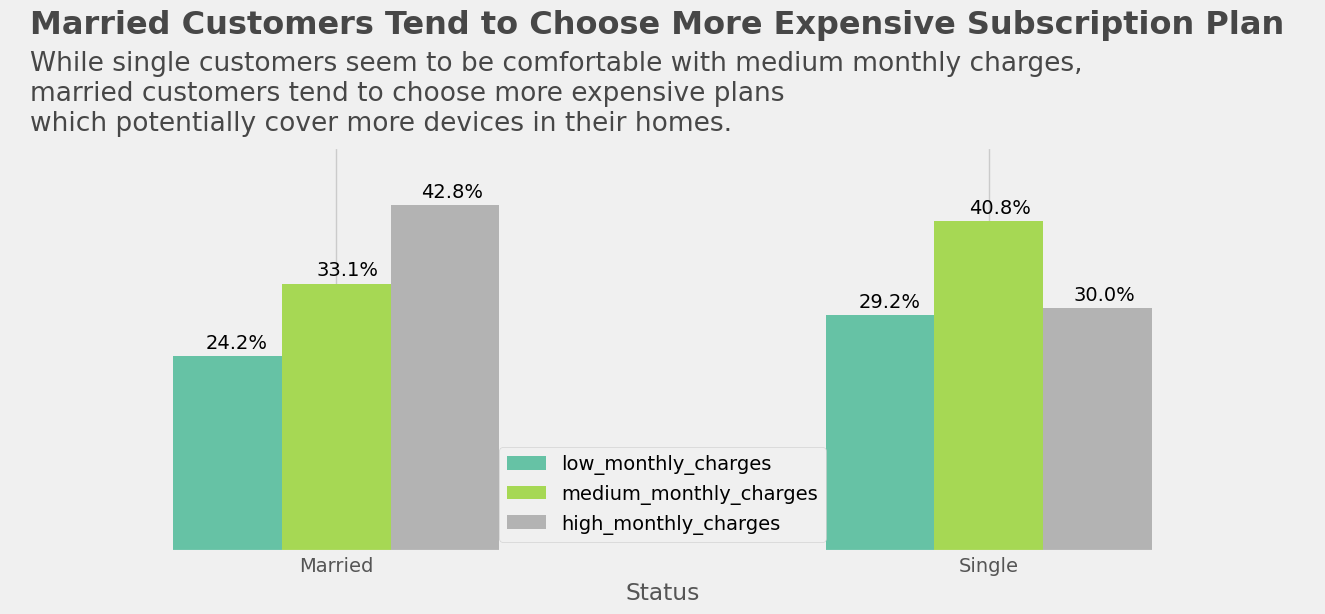

In [495]:
# plot
dfcp.plot(kind='bar', figsize=(15,5), colormap='Set2')

# title
plt.text(x=-0.47, y=0.64, s='Married Customers Tend to Choose More Expensive Subscription Plan', weight='bold', size=23, alpha=0.7)
plt.text(x=-0.47, y=0.52, s='While single customers seem to be comfortable with medium monthly charges,\nmarried customers tend to choose more expensive plans\nwhich potentially cover more devices in their homes.', size=19, alpha=0.7)
plt.yticks(ticks=(np.arange(0,0.6, 0.5)),labels=['',''])
plt.xticks(rotation=0)

plt.text(x=0 - 0.2, y=(dfcp.loc['Married'][0] + 0.01), s=f'''{round(dfcp.loc['Married'][0]*100, 1)}%''')
plt.text(x=0 - 0.03, y=(dfcp.loc['Married'][1] + 0.01), s=f'''{round(dfcp.loc['Married'][1]*100, 1)}%''')
plt.text(x=0 + 0.13, y=(dfcp.loc['Married'][2] + 0.01), s=f'''{round(dfcp.loc['Married'][2]*100, 1)}%''')
plt.text(x=1 - 0.2, y=(dfcp.loc['Single'][0] + 0.01), s=f'''{round(dfcp.loc['Single'][0]*100, 1)}%''')
plt.text(x=1 - 0.03, y=(dfcp.loc['Single'][1] + 0.01), s=f'''{round(dfcp.loc['Single'][1]*100, 1)}%''')
plt.text(x=1 + 0.13, y=(dfcp.loc['Single'][2] + 0.01), s=f'''{round(dfcp.loc['Single'][2]*100, 1)}%''')

plt.legend(loc='lower center')

plt.show()